# 🌺 Iris data





---

#### Name: 吳原博
#### Student ID: 0816004

---

## 助教好 😀
> 1. 程式碼的解釋會放在每個程式碼區塊上方的 markdown 裡，謝謝!
> 2. 由於我先完成蘑菇資料的報告，從 mushroom 開始看起也許會比較自然

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
from tabulate import tabulate
import math
from sklearn.naive_bayes import *
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.metrics import *
from IPython.display import display
from scipy.stats import norm

%matplotlib inline

# Variables

In [3]:
mushroom = ['cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
mush_atr = [['b','c','x','f','k','s'],['f','g','y','s'],['n','b','c','g','r','p','u','e','w','y'],['t','f'],['a','l','c','y','f','m','n','p','s'],['a','d','f','n'],['c','w','d'],['b','n'],['k','n','b','h','g','r','o','p','u','e','w','y'],['e','t'],['b','c','u','e','z','r','?'],['f','y','k','s'],['f','y','k','s'],['n','b','c','g','o','p','e','w','y'],['n','b','c','g','o','p','e','w','y'],['p','u'],['n','o','w','y'],['n','o','t'],['c','e','f','l','n','p','s','z'],['k','n','b','h','r','o','u','w','y'],['a','c','n','s','v','y'],['g','l','m','p','u','w','d']]
iris = ['sepal_length','sepal_width','petal_length','petal_width','class']

# Data Input and Visualization
- 我用 pandas 讀取資料，matplotlib 畫直方圖<br>
<br>
- 鳶尾花的統計數據，我用 tabulate 的表格呈現，雖然比 pandas 的表格來的要陽春，但很清楚地呈現每個 label 的每個 feature 的數據

C:\Users\user\AppData\Local\Temp/ipykernel_20296/3594054667.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.append(g[1].mean())
C:\Users\user\AppData\Local\Temp/ipykernel_20296/3594054667.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.append(g[1].std())


Name             Mean                   Std
---------------  ---------------------  ------------------------
Iris-setosa      sepal_length    5.006  sepal_length    0.352490
                 sepal_width     3.428  sepal_width     0.379064
                 petal_length    1.462  petal_length    0.173664
                 petal_width     0.246  petal_width     0.105386
                 dtype: float64         dtype: float64
Iris-versicolor  sepal_length    5.936  sepal_length    0.516171
                 sepal_width     2.770  sepal_width     0.313798
                 petal_length    4.260  petal_length    0.469911
                 petal_width     1.326  petal_width     0.197753
                 dtype: float64         dtype: float64
Iris-virginica   sepal_length    6.588  sepal_length    0.635880
                 sepal_width     2.974  sepal_width     0.322497
                 petal_length    5.552  petal_length    0.551895
                 petal_width     2.026  petal_width     0.274650
 

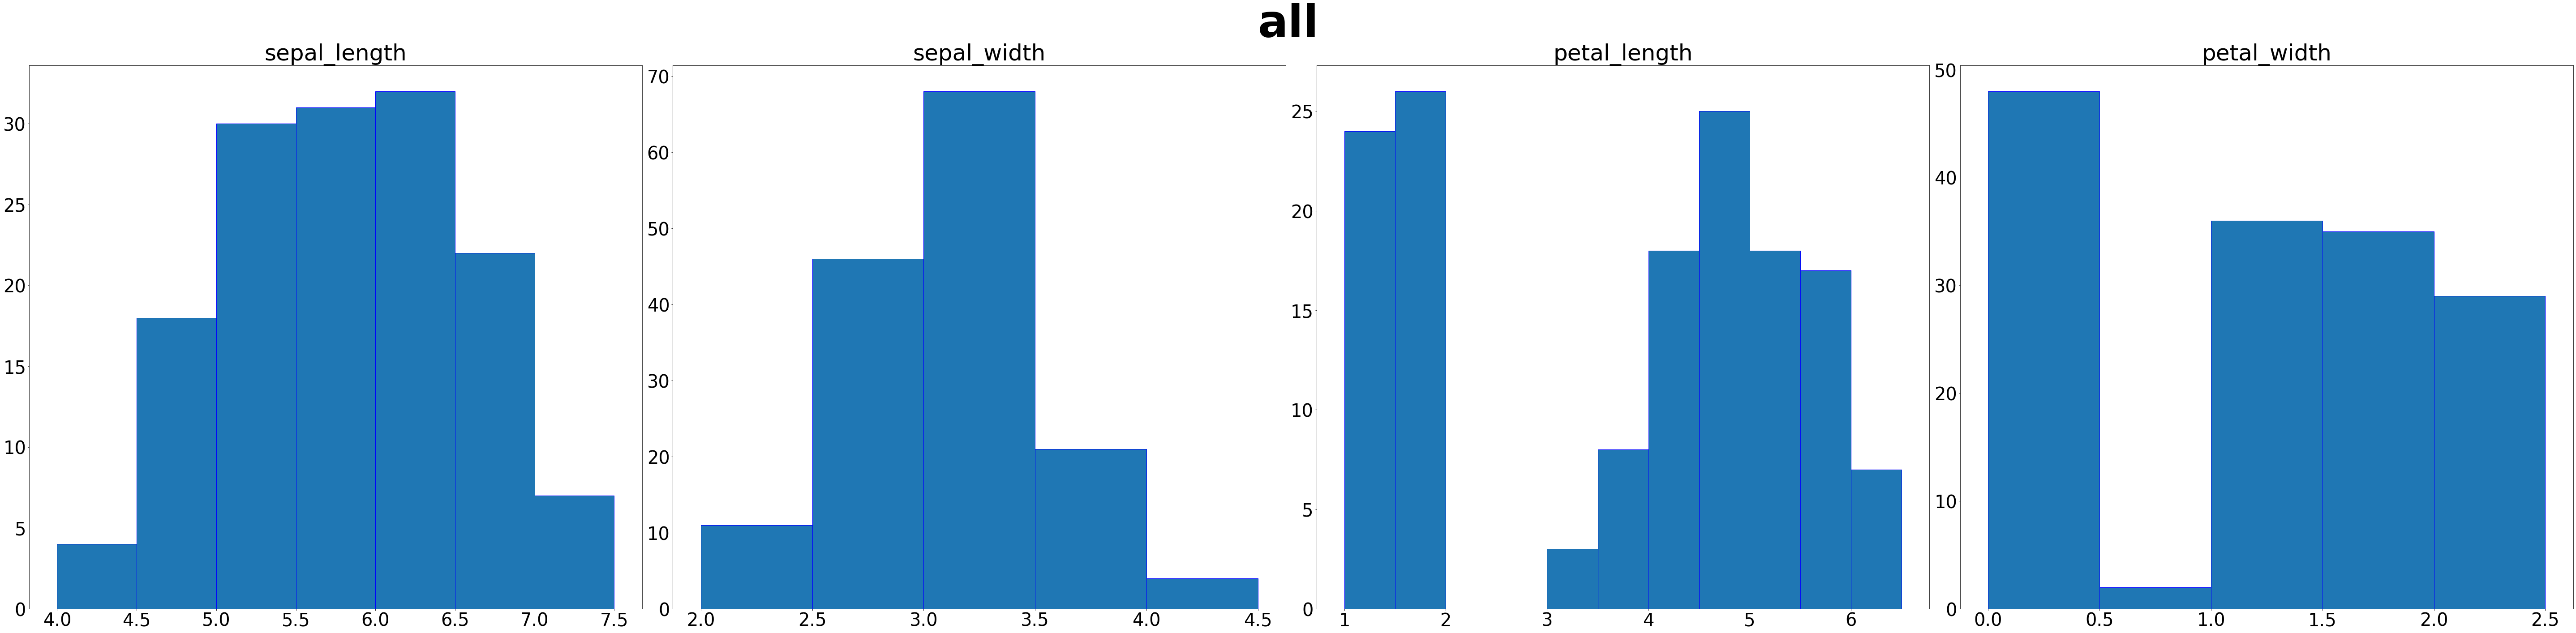

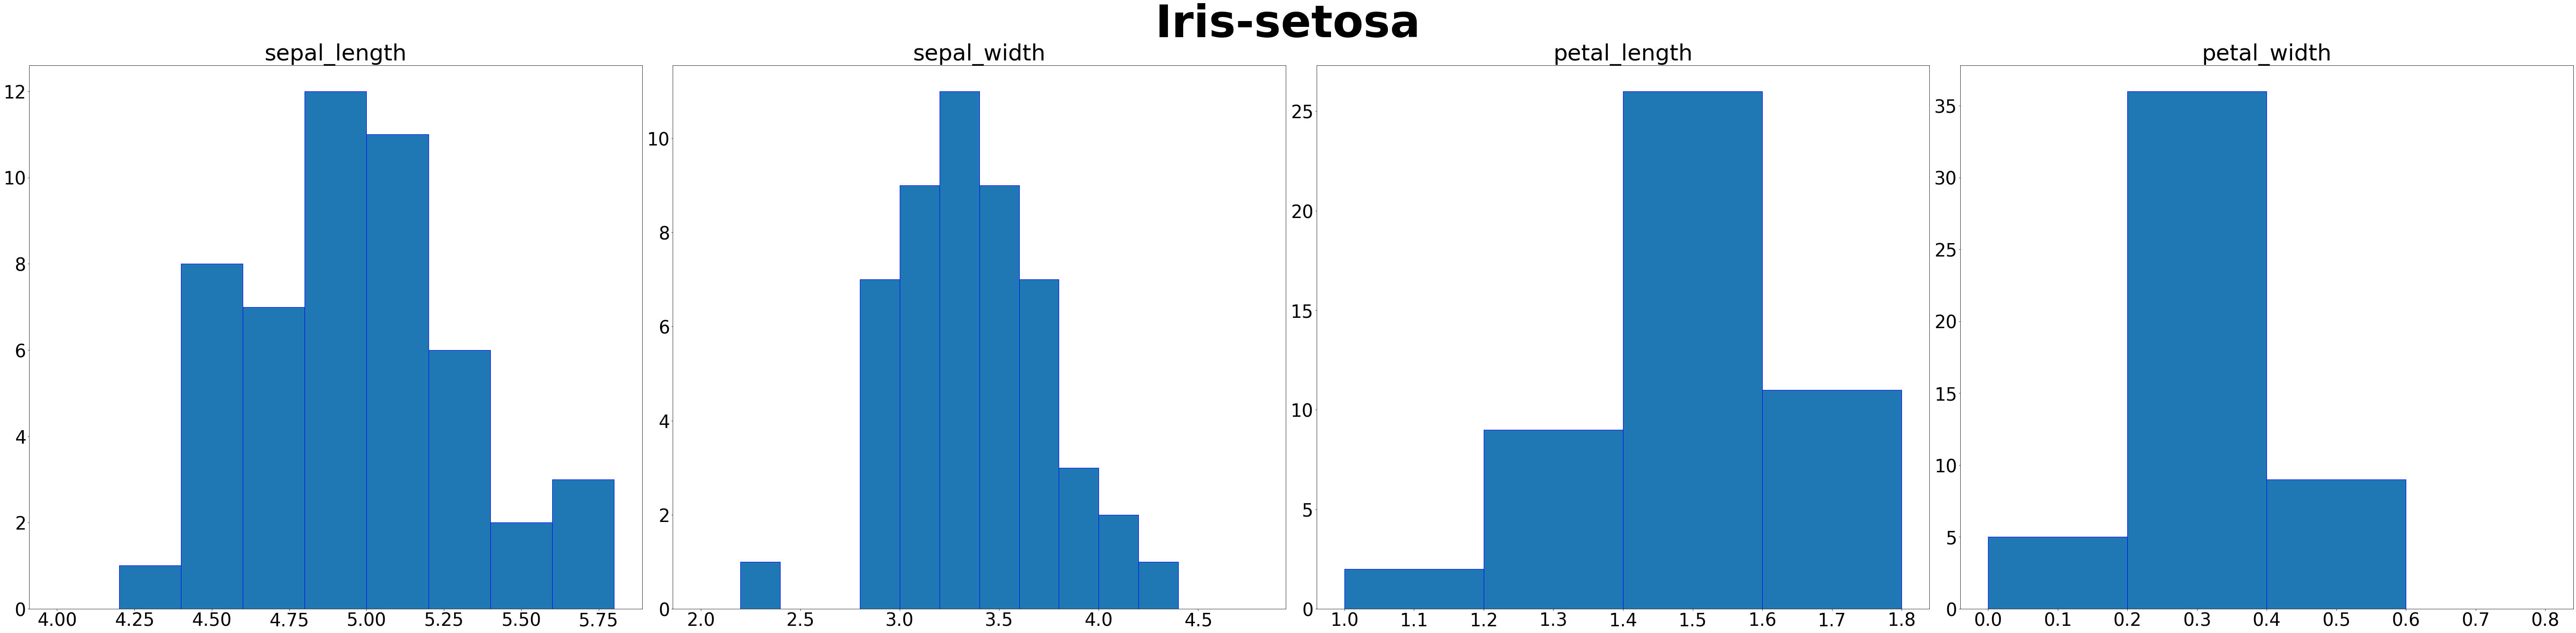

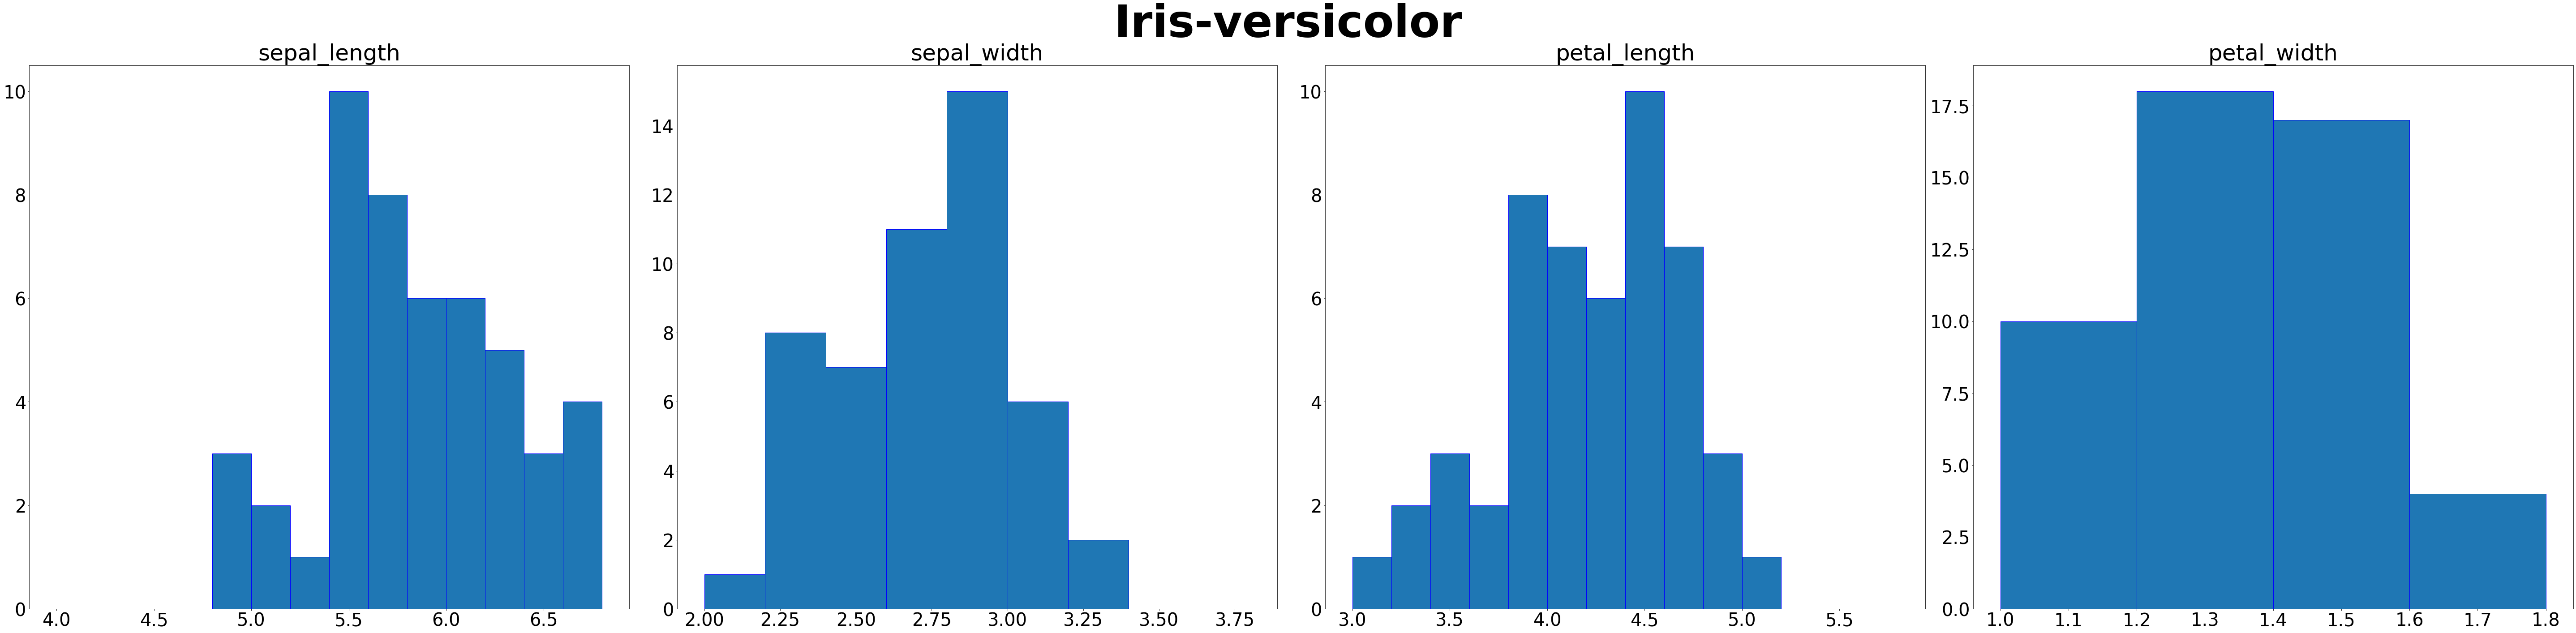

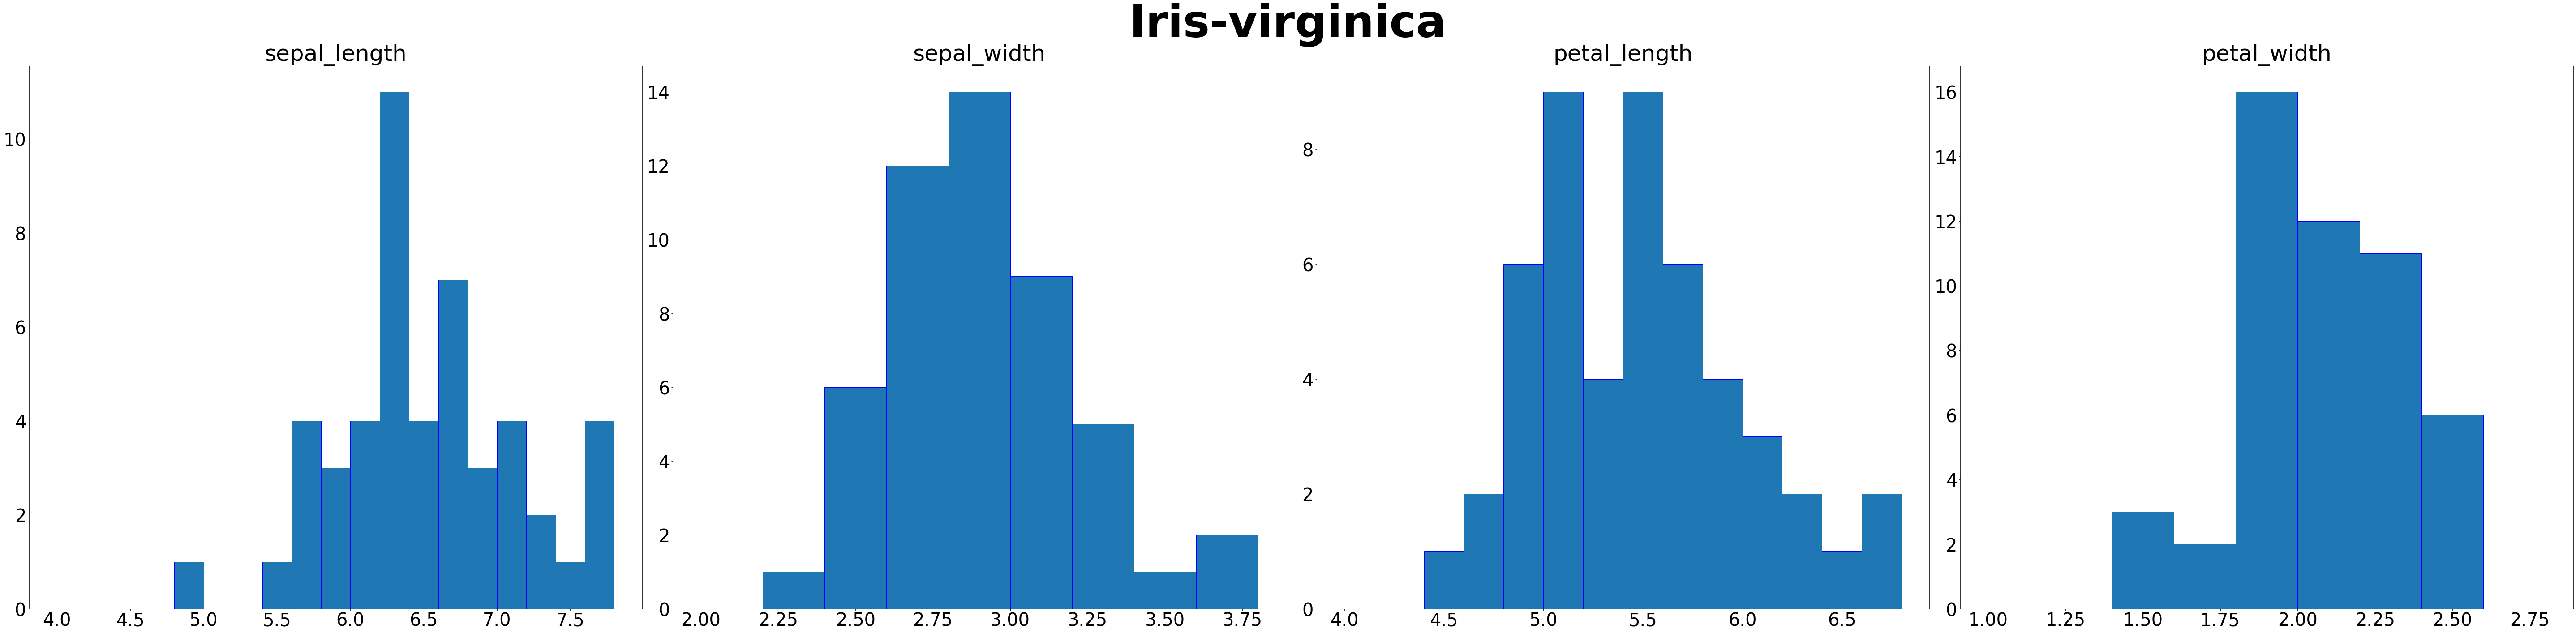

In [4]:
# Iris data
df_iris = pd.read_csv('bezdekIris.data',names=iris)

group = df_iris.groupby('class')
datas = []
for g in group:
    data = []
    data.append(g[0])
    data.append(g[1].mean())
    data.append(g[1].std())
    datas.append(data)
print(tabulate(datas,headers=['Name','Mean','Std']))

parameters = {'xtick.labelsize': 40,'ytick.labelsize': 40}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(80,20))
fig.suptitle('all',fontsize=100,fontweight="bold")
for i in range(4):
    lbound = int(df_iris[iris[i]].min())
    ubound = math.ceil(df_iris[iris[i]].max())
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(iris[i],fontsize=50)
    ax.hist(df_iris[iris[i]],bins=np.arange(lbound,ubound,0.5),edgecolor='b')
plt.tight_layout()
plt.show()


for g in group:
    fig = plt.figure(figsize=(80,20))
    fig.suptitle(g[0],fontsize=100,fontweight="bold")
    for i in range(4):
            lbound = int(g[1][iris[i]].min())
            ubound = math.ceil(g[1][iris[i]].max())
            ax = fig.add_subplot(1,4,i+1)
            ax.set_title(iris[i],fontsize=50)
            ax.hist(g[1][iris[i]],bins=np.arange(lbound,ubound,0.2),edgecolor='b')
    plt.tight_layout()
    plt.show()


# Data Procesing  & Train-Test-Split
- 資料處理和切割做起來和 mushroom 異曲同工，主要透過 sklearn 的函數完成

In [5]:
# iris
X = []
y = []
for i in range(df_iris.shape[0]):
    temp = [d for d in df_iris.iloc[i][0:4]]
    X.append(temp)
    y.append(df_iris.iloc[i][4])

# Holdout validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# k-fold cross-validation
kf = KFold(n_splits=3,shuffle=True)
X = np.array(X)
y = np.array(y)
i = 0
X_ktrain = []
X_ktest = []
y_ktrain = []
y_ktest = []
for train, test in kf.split(X):
    X_ktrain.append(X[train])
    X_ktest.append(X[test])
    y_ktrain.append(y[train])
    y_ktest.append(y[test])

# Model Construction
- iris 一樣使用 sklearn 內建的 GaussianNB() 完成<br>
<br>
- 由於連續數值的資料不需要做 laplace smoothing，程式碼比 mushroom 簡潔許多

In [6]:
clf = GaussianNB()

# Holdout validation
clf = GaussianNB()
clf.fit(X_train, y_train)
result = clf.predict(X_test)
matrix = confusion_matrix(y_test,result,labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
acc = accuracy_score(y_test,result)
recall = recall_score(y_test,result,average=None)
prec = precision_score(y_test,result,average=None)
print("Holdout score: ",clf.score(X_test,y_test))
#print(pd.DataFrame(matrix,columns=['setosa test','versicolor test','virginica test'],index=['setosa','versicolor','virginica']))

# k-fold cross-validation
kclf = GaussianNB()
kscore = []
kmatrix = [[0,0,0],[0,0,0],[0,0,0]]
kacc = 0
krecall = [0,0,0]
kprec = [0,0,0]
for i in range(3):
    kclf.fit(X_ktrain[i],y_ktrain[i])
    kscore.append(kclf.score(X_ktest[i],y_ktest[i]))
    kresult = kclf.predict(X_ktest[i])
    kmatrix += confusion_matrix(y_ktest[i],kresult,labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
    #print(pd.DataFrame(confusion_matrix(y_ktest[i],kresult,labels=['Iris-setosa','Iris-versicolor','Iris-virginica']),columns=['setosa test','versicolor test','virginica test'],index=['setosa','versicolor','virginica']))
    kacc += accuracy_score(y_ktest[i],kresult)
    krecall += recall_score(y_ktest[i],kresult,average=None)
    kprec += precision_score(y_ktest[i],kresult,average=None)
kmatrix = kmatrix / 3
kacc = kacc / 3
krecall = krecall / 3
kprec = kprec / 3
print("k-fold score: ",sum(kscore)/len(kscore))

Holdout score:  0.9111111111111111
k-fold score:  0.9466666666666667


# Result, Comparison & Conclusion

### 程式碼
- 這裡把處理好的資料整理好後用 dataframe 呈現為表格<br>

### 比較與結論
- 從結果看起來，使用 k-fold validation 的準確率都比較高<br>
<br>
- versicolor 的預測表現差了一點，有可能是因為他的數據相較於另外兩者更為接近

In [7]:
data = pd.DataFrame(matrix,columns=['setosa test','versicolor test','virginica test'],index=['setosa','versicolor','virginica'])
print("HOldout confusion matrix:")
display(data)
print('\n')
data = pd.DataFrame(kmatrix,columns=['setosa test','versicolor test','virginica test'],index=['setosa','versicolor','virginica'])
print("k-fold confusion matrix:")
display(data)
print('\n')

data = pd.DataFrame([[acc,recall[0],prec[0]],
                    [acc,recall[1],prec[1]],
                    [acc,recall[2],prec[2]],
                    [kacc,krecall[0],kprec[0]],
                    [kacc,krecall[1],kprec[1]],
                    [kacc,krecall[2],kprec[2]]],columns=['accuracy','sensitivity','precision'],
                    index=['setosa-holdout','versicolor-holdout','virginica-holdout','setosa-kfold','versicolor-kfold','virginica-kfold'])
display(data)


HOldout confusion matrix:


,setosa test,versicolor test,virginica test
setosa,16,0,0
versicolor,0,9,3
virginica,0,1,16




k-fold confusion matrix:


,setosa test,versicolor test,virginica test
setosa,16.666667,0.0,0.000000
versicolor,0.000000,15.0,1.666667
virginica,0.000000,1.0,15.666667


,accuracy,sensitivity,precision
setosa-holdout,0.911111,1.000000,1.000000
versicolor-holdout,0.911111,0.750000,0.900000
virginica-holdout,0.911111,0.941176,0.842105
setosa-kfold,0.946667,1.000000,1.000000
versicolor-kfold,0.946667,0.907602,0.938725
virginica-kfold,0.946667,0.942857,0.915789


# Question
- 問題一的平均和標準差如下，我把需要的數據取出來並運用統計函數運算<br>
<br>
- 機率密度函數我使用 scipy 來完成

question 1
 mean:  4.26
 standard deviation:  0.46991097723995795 

question 2


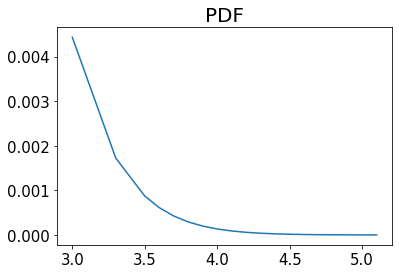

In [37]:
x = 0
group = df_iris.groupby('class')
print("question 1")
for g in group:
    if(g[0] == 'Iris-versicolor'):
        x = [i for i in g[1]['petal_length']]
        print(" mean: ",g[1]['petal_length'].mean())
        print(" standard deviation: ",g[1]['petal_length'].std(),"\n")
# probability density function
print("question 2")
x.sort()
#print(x)
#print(norm.pdf(x))
parameters = {'xtick.labelsize': 15,'ytick.labelsize': 15}
plt.rcParams.update(parameters)
plt.plot(x,norm.pdf(x))
plt.title("PDF",fontsize=20)
plt.show()